## Optimization of Support Vector Machine (SVM)

Support vector machine (SVM) is one of the most popular classifer which deals with the classification and regression problem with strong generalization capabilities. Optimization of SVM can be done by tuning of SVM parameters.

Here, the used dataset is heart disease dataset collected from Kaggle (https://www.kaggle.com/johnsmith88/heart-disease-dataset).

#### Importing libraries

In [144]:
import numpy as np    #for the analysis of provided data
import pandas as pd 
import matplotlib.pyplot as plt # python library useful for plotting graphs
import seaborn as sns # to exploring and understanding of data

%matplotlib inline

import os #operating system

from sklearn.metrics import confusion_matrix #to evaluate the performance of a classification model by the performance metrics calculation 
from sklearn import metrics, preprocessing # preprocessing to convert the provided raw data into clean data
#metrics to measure classification model performance
from sklearn.metrics import classification_report #to show the result of classification model

from sklearn.svm import SVC # importing support vector classifier (SVC)
from sklearn.model_selection import cross_val_score #to estimate the skill of machine learning model
from sklearn.model_selection import GridSearchCV #to fit the model on the training set

from sklearn.pipeline import make_pipeline # for constructing pipelines
from sklearn.feature_selection import SelectKBest, f_regression # SelectKBest to select the features according to the best K score
#f_regression to rank the features on the same order



#### Importing dataset

In [145]:
data_heart = pd.read_csv("heart_disease.csv")

In [146]:
type(data_heart)

pandas.core.frame.DataFrame

##### Finding out the samples and features number

In [147]:
data_heart.shape

(303, 14)

The provided dataset contains 303 samples and 14 features

In [148]:
data_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


##### Finding out the statistical description¶

In [149]:
data_heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


##### Checking out datatype information

In [150]:
data_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


##### Checking for the missing values

In [151]:
data_heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There is no missing value in this dataset

##### Data type target

In [152]:
data_heart.target.unique()

array([1, 0])

Here, 1= Patients with heart disease

     0= Patients without heart disease 

##### Storing in X and y

In [39]:
X,y=data_heart,data_heart.target
X.drop('target',axis=1,inplace=True)


In [40]:
X.shape

(303, 13)

In [41]:
y.shape

(303,)

##### Data Normalization

Here, the Z-score (Zero mean unit variance) is implemented. The process is to centering the feature at mean 0 with a standard deviation of 1. Z-score normalization is highly impactful for SVM classifier.

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
sc = StandardScaler()
X = sc.fit_transform(X)

##### Dimensionality reduction by principal component analysis (PCA)

Among the dimensionality reduction algorithms Principal Component Analysis(PCA) is one of the most popular linear dimension reduction algorithm.

In [74]:
from sklearn.decomposition import PCA
# feature extraction
pca = PCA(n_components=10) # extracting 10 features out of 13 features  
fit = pca.fit(X)
X_pca = pca.transform(X)

##### Retrieving model accuracy: Spliting dataset into training and testing

The dataset has ben split into 80% training and 20% test set

In [98]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=5,test_size=0.4,shuffle=True)

In [99]:
print ("train_set_x shape: " + str(X_train.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(X_test.shape))
print ("test_set_y shape: " + str(y_test.shape))

train_set_x shape: (181, 13)
train_set_y shape: (181,)
test_set_x shape: (122, 13)
test_set_y shape: (122,)


##### Creating SVM classifier
Creation of SVM classifier and train it on the 80% of the dataset. 

In [100]:
clf_heart_disease = SVC(probability=True)
clf_heart_disease.fit(X_train, y_train)

SVC(probability=True)

Analyzing the prediction accuracy on 20% test dataset

In [101]:
classifier_score = clf_heart_disease.score(X_test, y_test)
print ('The classifier accuracy score is {:03.2f}'.format(classifier_score))


The classifier accuracy score is 0.81


Accessing cross validation score with k value of 10 and 3 fold cross validation

In [102]:
clf2_heart_disease = make_pipeline(SelectKBest(f_regression, k=10),SVC(probability=True))
scores = cross_val_score(clf2_heart_disease, X_pca, y, cv=3)

Getting average of 10-fold cross-validation score using an SVC estimator.

In [103]:
n_folds = 10
cv_error = np.average(cross_val_score(SVC(), X_pca, y, cv=n_folds))
print ('The {}-fold cross-validation accuracy score for this classifier is {:.2f}'.format(n_folds, cv_error))


The 10-fold cross-validation accuracy score for this classifier is 0.83


##### Generation of Classification Report
In order to access the quality of prediction

In [104]:
y_pred = clf_heart_disease.fit(X_train, y_train).predict(X_test)
class_report = metrics.confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79        55
           1       0.83      0.82      0.83        67

    accuracy                           0.81       122
   macro avg       0.81      0.81      0.81       122
weighted avg       0.81      0.81      0.81       122



##### The classifier accuracy is 0.81

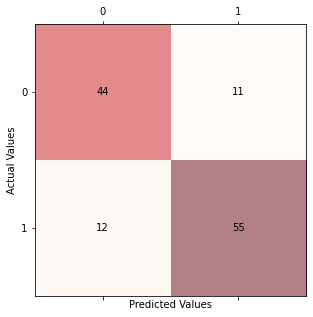

In [105]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(class_report, cmap=plt.cm.Reds, alpha=0.5)
for i in range(class_report.shape[1]):
     for j in range(class_report.shape[0]):
         ax.text(x=i, y=j,
                s=class_report[j, i], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()

##### Understanding the Confusion Matrix
* The top left box indicates True Negative value (TN).

* The top right box indicates False Negative value (FN). 

* The bottom left box indicates False Positive (FP) value.

* The bottom right box indicates True Positive (TP) value..
---------------------------------------------------------------------------------
- 44 patients are predicted corrected without heart disease.

- 11 patients are wrongly predicted without heart disease.

- 12 patients are wrongly predicted with heart disease.

- 55 patients are predicted correctly with heart disease.


##### Optimization of SVM

###### For the optimization the following steps can be implied:

- Tuning of hyperparameters (C and gamma).

   - C hyperparameter is used to control error.
               
   - gamma hyperparameter control the curving of decision boundary.
   
               
- Tuning the kernel type (SVM-linear, SVM-polynomial, SVM-RBF (Gaussian radial basis function), SVM- sigmoid).

- Grid search parameter tuning.

##### Training classifiers.

In [115]:
kernel_values = [ 'linear' ,  'poly' ,  'rbf' ,  'sigmoid' ]
param_grid = {'C': np.logspace(-3, 2, 5), 'gamma': np.logspace(-3, 2, 5),'kernel': kernel_values}

grid = GridSearchCV(SVC(), param_grid=param_grid, cv=8) # 3 fold grid search cross validation
grid.fit(X_train, y_train)

GridSearchCV(cv=8, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 1.77827941e-02, 3.16227766e-01, 5.62341325e+00,
       1.00000000e+02]),
                         'gamma': array([1.00000000e-03, 1.77827941e-02, 3.16227766e-01, 5.62341325e+00,
       1.00000000e+02]),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [116]:
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 100.0, 'gamma': 0.01778279410038923, 'kernel': 'sigmoid'} with a score of 0.82


In [117]:
grid.best_estimator_.probability = True
clf_heart_optimized = grid.best_estimator_

##### Generation of Classification report after Optimization

[[47  8]
 [10 57]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        55
           1       0.88      0.85      0.86        67

    accuracy                           0.85       122
   macro avg       0.85      0.85      0.85       122
weighted avg       0.85      0.85      0.85       122



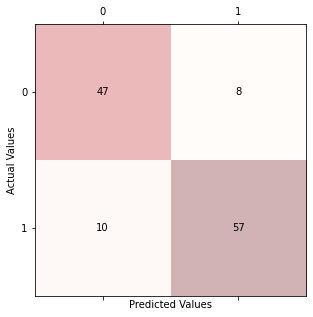

In [118]:
y_pred = clf_heart_optimized.fit(X_train, y_train).predict(X_test)
c_m_optimized= metrics.confusion_matrix(y_test, y_pred)
print(c_m_optimized)
print(classification_report(y_test, y_pred ))

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(c_m_optimized, cmap=plt.cm.Reds, alpha=0.3)
for i in range(c_m_optimized.shape[0]):
     for j in range(c_m_optimized.shape[1]):
         ax.text(x=j, y=i,
                s=c_m_optimized[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()

##### Accuracy score after optimization is 0.85

##### Understanding confusion matrix after optimization

- 47 patients are predicted corrected without heart disease.

- 8 patients are wrongly predicted without heart disease.

- 10 patients are wrongly predicted with heart disease.

- 57 patients are predicted correctly with heart disease.


##### Plotting Decision Boundaries of SVM with different kernels

In [132]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
from sklearn import svm, datasets

def decision_plot(X_train, y_train, n_neighbors, weights):
       h = .02  # step size in the mesh

Xtrain = X_train[:, :2] #taking the first two features.

# Creating color maps

cmap_light = ListedColormap(['#7fc97f', '#386cb0', '#f0027f'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


C = 3.0  # SVM regularization parameter

svm = SVC(kernel='linear', random_state=0, gamma=0.1, C=C).fit(Xtrain, y_train)
rbf_svc = SVC(kernel='rbf', gamma=0.8, C=C).fit(Xtrain, y_train)
poly_svc = SVC(kernel='poly', degree=2, C=C).fit(Xtrain, y_train)

In [135]:
plt.rcParams['figure.figsize'] = (16, 10) 
plt.rcParams['axes.titlesize'] = 'large'
    
#creating a mesh to plot in
x_min, x_max = Xtrain[:, 0].min() - 1, Xtrain[:, 0].max() + 1
y_min, y_max = Xtrain[:, 1].min() - 1, Xtrain[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

# title for the plots
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 2) kernel']

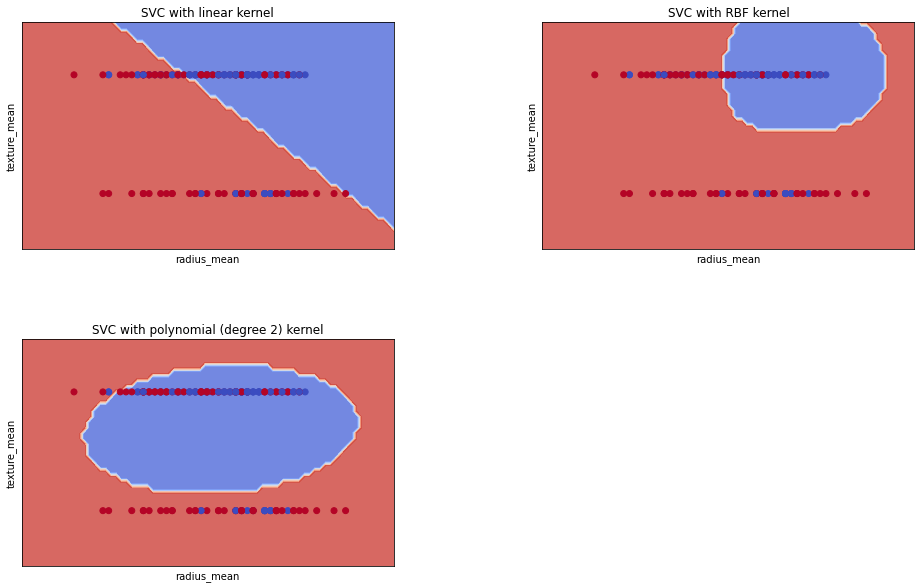

In [136]:
for i, clf in enumerate((svm, rbf_svc, poly_svc)):
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Puting the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Ploting the training points
    plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=y_train, cmap=plt.cm.coolwarm)
    plt.xlabel('radius_mean')
    plt.ylabel('texture_mean')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()